In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5770,6252-DFGTK,Female,0,Yes,No,37,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,One year,No,Credit card (automatic),68.10,2479.25,No
1989,9885-MFVSU,Female,0,Yes,Yes,35,No,No phone service,DSL,Yes,...,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),46.35,1662.05,No
3536,2254-DLXRI,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,79.15,79.15,No
4721,4211-MMAZN,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,20.25,Yes
6277,4195-SMMNX,Male,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,33.2,Yes
3814,6701-YVNQG,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),88.70,6301.7,No
2832,0635-WKOLD,Male,0,Yes,No,40,Yes,Yes,DSL,No,...,No,Yes,Yes,No,One year,No,Credit card (automatic),70.75,2921.75,No
5525,1333-PBMXB,Female,0,Yes,Yes,54,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),24.75,1342.15,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
6437,2995-YWTCD,Female,0,Yes,Yes,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.90,467.7,No


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

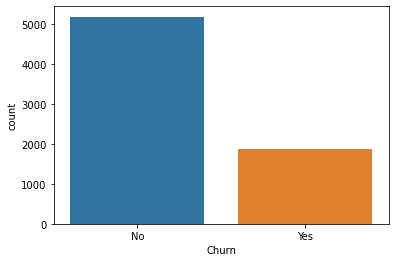

In [6]:
sns.countplot(df['Churn']);

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
Churned = df[df.Churn == 'Yes'].shape[0]
Retained = df[df.Churn == 'No'].shape[0]

In [9]:
#Customer lest the company
Chu_rn = (Churned/(Churned+Retained))*100
Chu_rn

26.536987079369588

In [10]:
#Customer believe in company
Re_tained = (Retained/(Churned+Retained))*100
Re_tained

73.4630129206304

### Visualization 

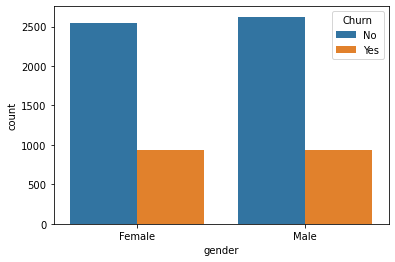

In [11]:
sns.countplot(data = df, x = 'gender', hue = 'Churn');

In [12]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

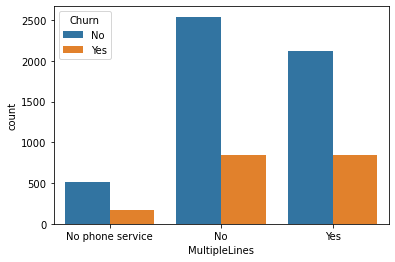

In [13]:
sns.countplot(data = df, x = 'MultipleLines', hue = 'Churn');

In [14]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

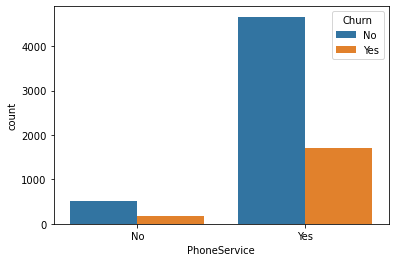

In [15]:
sns.countplot(data = df, x ='PhoneService', hue = 'Churn' );

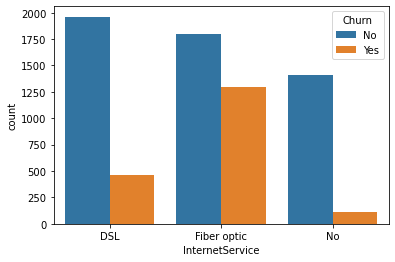

In [16]:
sns.countplot(data = df, x = 'InternetService', hue = 'Churn');

### Preprocessing Data

In [17]:
df = df.drop('customerID', axis = 1)

In [18]:
df.shape

(7043, 20)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
for col in df.columns:
    if df[col].dtype == np.number:
        continue
        
    df[col] = LabelEncoder().fit_transform(df[col])
    

In [21]:
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6924,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,69.35,5444,1
3569,1,0,0,0,17,1,0,2,1,1,1,1,1,1,1,0,3,19.95,2700,0
3281,1,0,1,0,49,1,0,1,0,2,0,0,2,2,2,1,2,94.80,3973,0
5323,0,0,1,1,58,1,2,1,0,2,2,0,2,2,1,1,1,105.20,5056,0
1712,0,0,0,0,29,1,2,0,0,2,0,0,0,0,1,1,2,55.25,1088,0
5281,0,0,1,1,72,1,2,0,2,2,0,2,0,0,2,0,1,66.75,4033,0
6890,1,0,0,0,53,1,0,0,0,0,2,0,0,2,1,1,2,61.10,2913,0
6579,1,0,0,0,72,1,2,0,2,0,2,2,2,2,2,0,1,84.30,4908,0
6580,0,0,1,1,49,1,0,0,0,2,2,0,2,2,1,0,1,78.00,3274,0
1683,1,0,1,1,23,1,0,2,1,1,1,1,1,1,2,0,1,19.60,3629,0


In [22]:
x = df.drop('Churn', axis =1)
y = df['Churn']

### Scaling the data set 

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
future_x = StandardScaler().fit_transform(x)

### Split data set 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(future_x, y, test_size = 0.2, random_state = 42)

### Logistic Regression Model 

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(x_train, y_train)

LogisticRegression()

In [30]:
pred = model.predict(x_test)

In [31]:
pred

array([1, 0, 0, ..., 0, 0, 0])

### Performance Metrics 

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, pred)

0.8161816891412349

In [35]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



Text(69.0, 0.5, 'Truth')

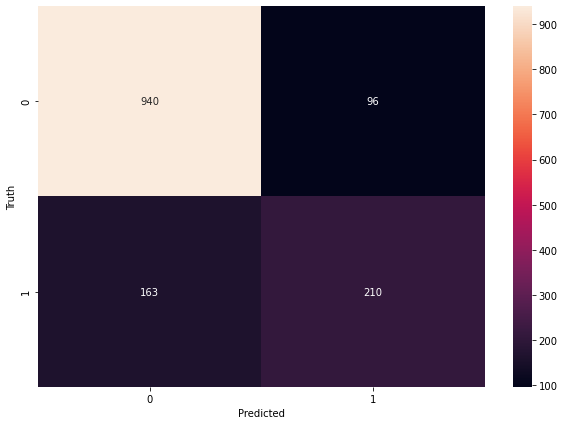

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

